<a href="https://colab.research.google.com/github/fogg-lab/tissue-model-analysis-tools/blob/main/notebooks/microvessels_segmentation_training/train_binary_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train Binary Segmentation
## Instructions to run
- If you're running this notebook in Colab, run the first section (Environment setup) to install the packages
- Edit the configuration variables in the [Constants](#constants) section and the [Training configuration](#training-configuration) section as needed.
- Customize the image transformations pipeline in the [Image transformations and augmentation](#image-transformations-and-augmentation) section as needed.
- Run all the cells
- *Note*: It is recommended to run this notebook on a system with a CUDA-capable GPU, but if you want to try training on Colab, you can use a GPU runtime and use this trick to keep the runtime alive: https://stackoverflow.com/a/59226569

## Environment setup (for Colab)
**If you are not in Colab, follow the installation instructions in the README.**

Installation time: ~5 minutes

In [ ]:
def in_colab() -> bool:
    """Check if the code is running in Google Colab."""
    try:
        import google.colab
        return True
    except ImportError:
        return False

if in_colab():
    !pip install albumentations
    !pip install boost
    !pip install dask
    !pip install gudhi
    !pip install jupyterlab
    !pip install matplotlib
    !pip install networkx
    !pip install opencv-python
    !pip install scikit-learn
    !pip install scipy
    !pip install setuptools
    !pip install keras-tuner
    !pip install pillow
    !pip install scikit-image
    !pip install tqdm
    !pip install imagecodecs
    !pip install pandas

    # Install the fl_tissue_model_tools (tmat) package
    !pip install -I fl_tissue_model_tools@git+https://github.com/fogg-lab/tissue-model-analysis-tools.git#subdirectory=src

    # Configure package home directory
    !tmat configure /content/fl_tissue_model_tools
else:
    print('Not in Google Colab. Skipping environment setup.')

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.9/65.9 kB 1.8 MB/s eta 0:00:00
  Created wheel for boost: filename=boost-0.1-py3-none-any.whl size=12445 sha256=462cb4d53ff4084b5977421422e7ba623ea3f8284ed0da74d2db8c1c7f40cfd1
  Stored in directory: /root/.cache/pip/wheels/a3/87/ab/8641d30039f2fb7605bab327a7e0608359c304ce565a1e6614
Successfully built boost
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.3/380.3 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.9/105.9 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 68.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.6/39.6 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.8/417.8 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 82.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 67.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 67.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 845.8/845.8 kB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 720.1/720.1 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.9/124.9 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.3/195.3 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

## Import packages

In [ ]:
from pathlib import Path
import math
import os
import requests
from zipfile import ZipFile

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import albumentations as A
if not hasattr(Image, 'Resampling'):
    Image.Resampling = Image

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow.keras.backend as K
from tensorflow.config import list_physical_devices
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau, CSVLogger
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras import optimizers
from tensorflow.keras.utils import custom_object_scope

from fl_tissue_model_tools.transforms import get_elastic_dual_transform
from fl_tissue_model_tools.preprocessing import get_batch_augmentor
from fl_tissue_model_tools import models, models_util, defs
from fl_tissue_model_tools.helper import get_img_mask_paths

# Make sure TensorFlow is using GPU - print out the available GPUs
available_gpus = list_physical_devices('GPU')
if len(available_gpus) == 0:
    print("WARNING: TensorFlow isn't using a GPU.")
else:
    print(f"Available GPUS:\n{available_gpus}")

Available GPUS:
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


<a name="constants"></a>
## Constants

In [ ]:
rand_seed = 1234

batch_size = 8

# size of the random crop window, cannot be larger than the image size
crop_window = (512, 512)

# model input shape. cropped images/masks are resampled to this shape
# target_shape must be divisible by 32, and must be square if using the patch-blending segmentor
target_shape = (320, 320)
#target_shape = crop_window     # uncomment to disable resizing the crops

training_dir = defs.MODEL_TRAINING_DIR / "binary_segmentation"
experiment_number = models_util.get_last_exp_num() + 1
checkpoint_save_path = training_dir / "checkpoints" / f"checkpoint_{experiment_number}.h5"
log_dir = training_dir / f"logs_{experiment_number}"

images_dir = os.path.join(training_dir, "images")
labels_dir = os.path.join(training_dir, "masks")

# number of times to iterate over the samples each epoch
repeat_dset_n_times = 50

In [ ]:
# Create the training and directory if it doesn't exist
Path(training_dir).mkdir(exist_ok=True)
Path(log_dir).mkdir(exist_ok=True)

### Hyperparameter search space

In [ ]:
filter_counts_options = [
    (16, 32, 64, 128),
    (32, 64, 128, 256),
    (64, 128, 256, 512)
]

# Scale learning rate options linearly according to batch size (stays as-is when batch size is 16)
hp_search_initial_lr_options = [1e-4, 2.5e-4, 5e-4, 1e-3, 2.5e-3, 5e-3, 1e-2]
hp_search_initial_lr_options = np.array(hp_search_initial_lr_options) * batch_size/16

## Download demo training dataset

In [ ]:
filename = "branching_training_data.zip"
url = f"https://github.com/fogg-lab/tissue-model-analysis-tools/raw/main/sample_data/{filename}"
data = requests.get(url).content
archive_save_path = os.path.join(training_dir, filename)
open(archive_save_path, 'wb').write(data)

# Extract the archive
with ZipFile(archive_save_path, 'r') as data_archive:
    data_archive.extractall(training_dir)

# Delete the archive
os.remove(archive_save_path)

## Validate data paths

In [ ]:
image_mask_paths = get_img_mask_paths(images_dir, labels_dir)
img_paths, mask_paths = zip(*image_mask_paths)

print(f"Found {len(image_mask_paths)} image/label pairs")

for img_path, mask_path in image_mask_paths:
    image = cv2.imread(img_path, 0)
    mask = cv2.imread(mask_path, 0)

    assert image.shape == mask.shape, (
        f"Image {img_path} and mask {mask_path} have different shapes: {image.shape} vs {mask.shape}"
    )

    if np.unique(mask).tolist() not in ([0], [255], [0, 255]):
        print(f"Mask {mask_path} has unexpected values: {np.unique(mask)}")

Found 42 image/label pairs


## Data pipeline

### Get training and validation image paths

In [ ]:
n_val = int(len(img_paths) * 0.2)

# Shuffle the data image/mask keeping pairs together

#indices = np.random.permutation(len(img_paths))    # non-seeded random shuffle
rs = np.random.RandomState(seed=rand_seed)
indices = rs.permutation(len(img_paths))

img_paths = [img_paths[i] for i in indices]
mask_paths = [mask_paths[i] for i in indices]

train_img_paths = img_paths[: -n_val]
train_mask_paths = mask_paths[:-n_val]

val_img_paths = img_paths[-n_val:]
val_mask_paths = mask_paths[-n_val:]

## Compute sample weights & mean/std for training data

In [ ]:
y_train_labels = models_util.load_y(train_mask_paths)

n_fg = np.sum(y_train_labels == 1)
n_bg = np.sum(y_train_labels == 0)
fg_weight = float(n_fg + n_bg) / (2.0 * n_fg)
bg_weight = float(n_fg + n_bg) / (2.0 * n_bg)
sample_weights = {0: bg_weight, 1: fg_weight}
sample_weights

{0: 0.5218229092992872, 1: 11.955851122845736}

In [ ]:
# Get the mean and std of the training set images
x_train_imgs = models_util.load_x(img_paths)
im_mean = np.mean(x_train_imgs)
im_std = np.std(x_train_imgs)

im_mean, im_std

(20396.227041382925, 16156.001084382677)

<a name="image-transformations-augmentation"></a>
### Image transformations and augmentation

In [ ]:
# Helper functions

def get_resizer(ds_shape):
    def ds_im_mask(image, mask):
        """Downscale image with Lanczos interpolation and mask with nearest neighbor"""
        image = cv2.resize(image, ds_shape, interpolation=cv2.INTER_LANCZOS4)
        mask = np.array(Image.fromarray(mask).resize(ds_shape, resample=Image.Resampling.NEAREST))
        return {'image': image, 'mask': mask}
    return ds_im_mask

def get_normalizer(mean, std):
    def norm_im(image, mask):
        """Normalize image with mean and std of training set images"""
        image = ((image - mean) / std).astype(np.float32)
        return {'image': image, 'mask': mask}
    return norm_im

In [ ]:
train_transforms = train_transforms = [
    A.Compose([
        A.Rotate(p=1.0, border_mode=cv2.BORDER_CONSTANT, value=0, mask_value=0),
        A.RandomCrop(height=crop_window[0], width=crop_window[1]),
        A.Flip(p=0.5),
        A.RandomBrightnessContrast(p=0.7),
        A.OneOf([
                A.MultiplicativeNoise(p=0.5, elementwise=True),
                A.AdvancedBlur(p=0.5)
        ], p=0.8),
    ]),     # Albumentations pipeline
    get_elastic_dual_transform(p=0.85),
    get_resizer(target_shape),
    get_normalizer(im_mean, im_std)
]

val_transforms = [
    A.Compose([
        A.RandomCrop(height=crop_window[0], width=crop_window[1]),
        A.Flip(p=0.5),
        A.RandomRotate90(p=0.5)
    ]),
    get_resizer(target_shape),
    get_normalizer(im_mean, im_std)
]

train_augmentor = get_batch_augmentor(train_transforms)
val_augmentor = get_batch_augmentor(val_transforms)

### Create the training and validation data generators

In [ ]:
rs = np.random.RandomState(seed=rand_seed)

train_gen = models_util.BinaryMaskSequence(
    batch_size, train_img_paths, train_mask_paths, rs,
    models_util.load_x, models_util.load_y, augmentation_function=train_augmentor,
    sample_weights=sample_weights, repeat_n_times=repeat_dset_n_times, shuffle=True
)

val_gen = models_util.BinaryMaskSequence(
    batch_size, val_img_paths, val_mask_paths,
    rs, models_util.load_x, models_util.load_y, augmentation_function=val_augmentor,
    sample_weights=sample_weights, repeat_n_times=repeat_dset_n_times, shuffle=True)

### Test the training generator

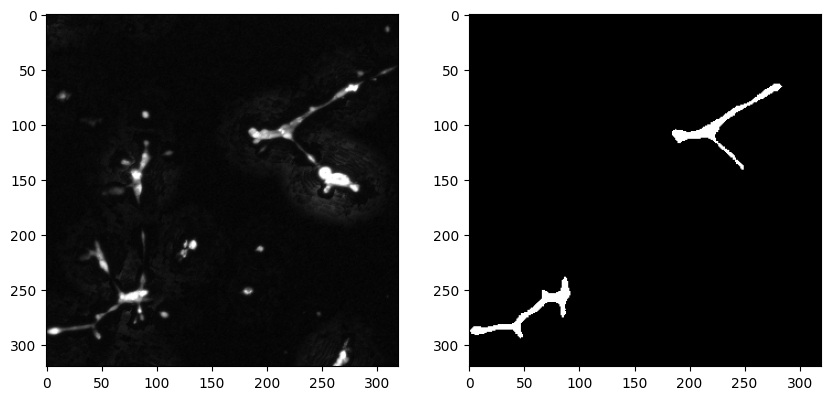

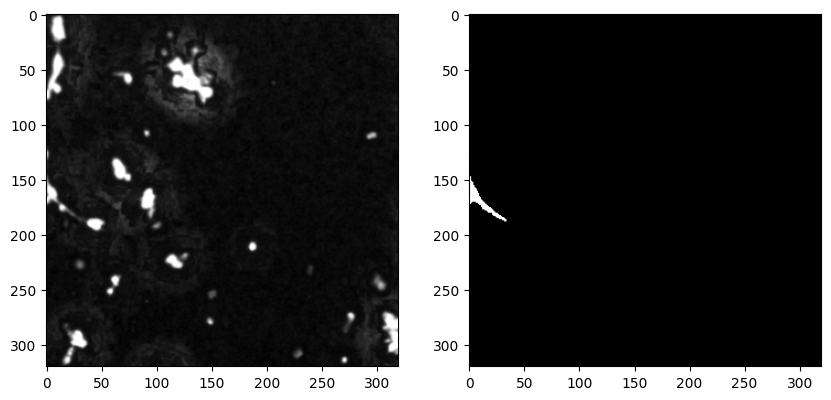

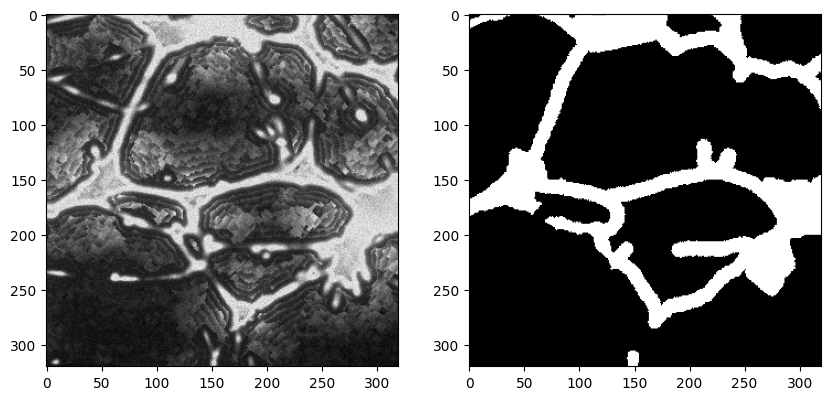

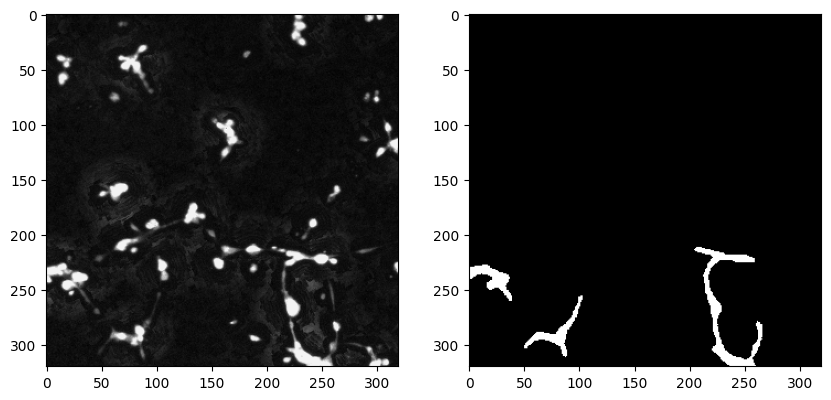

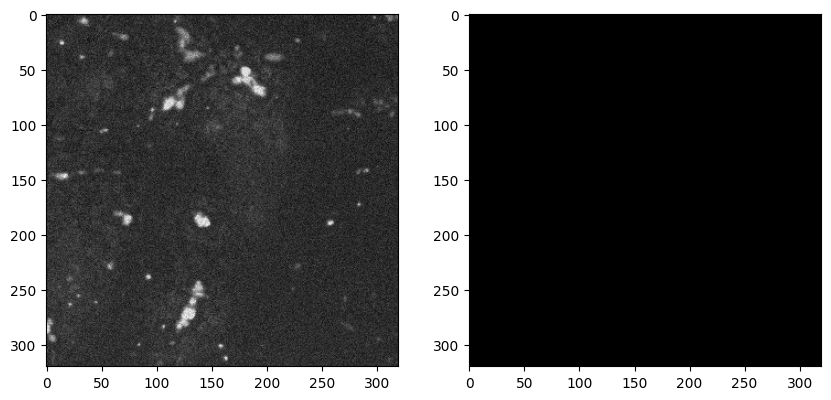

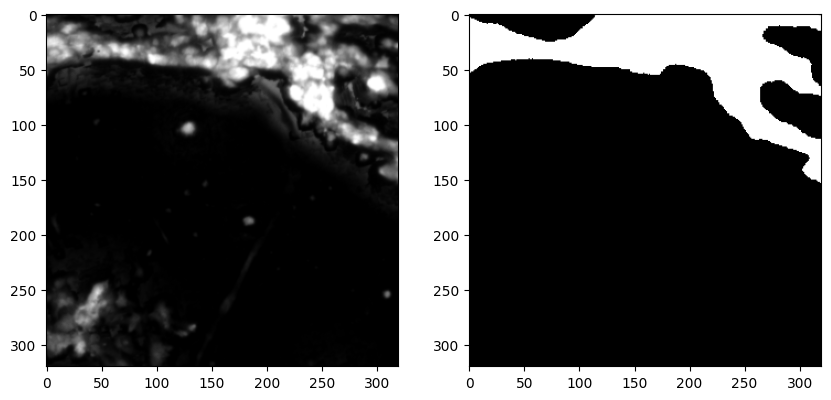

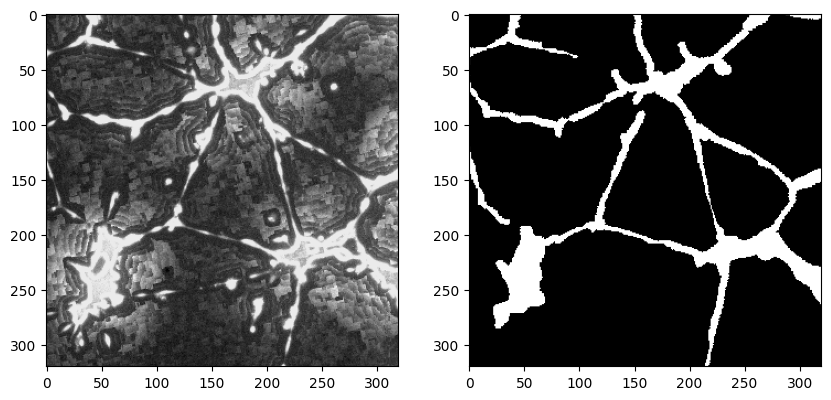

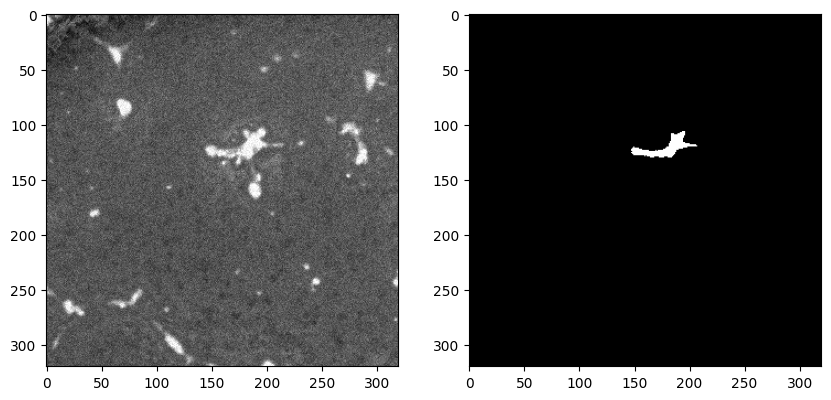

In [ ]:
X, y, _ = train_gen[1]
for i in range(batch_size):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(X[i][:,:,0], cmap='gray')
    ax[1].imshow(y[i][:,:,0], cmap='gray')
    plt.show()

### Test the validation generator

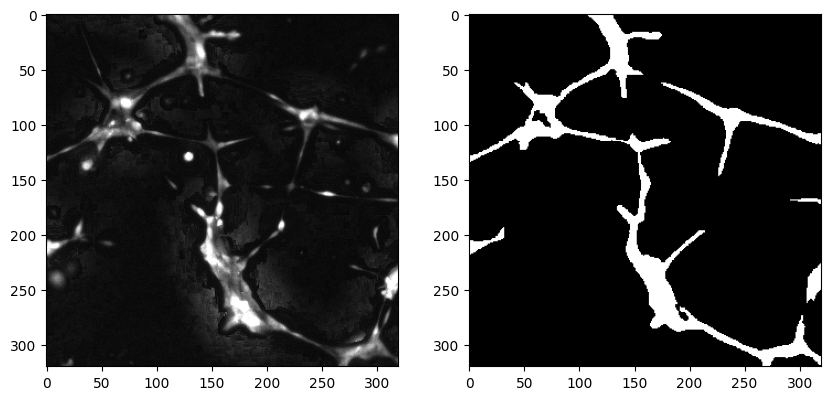

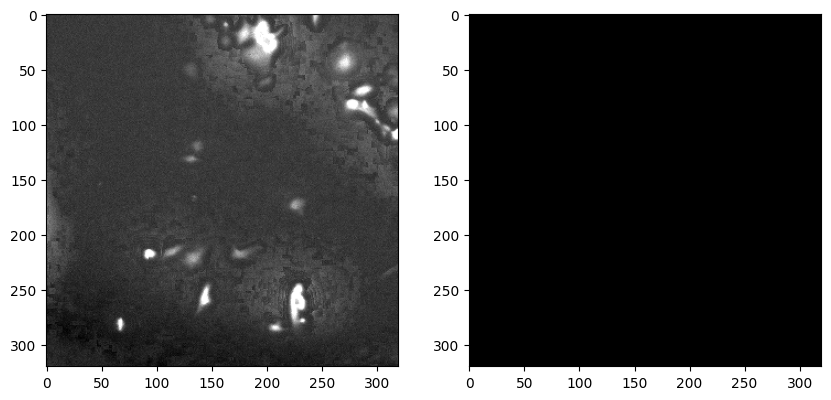

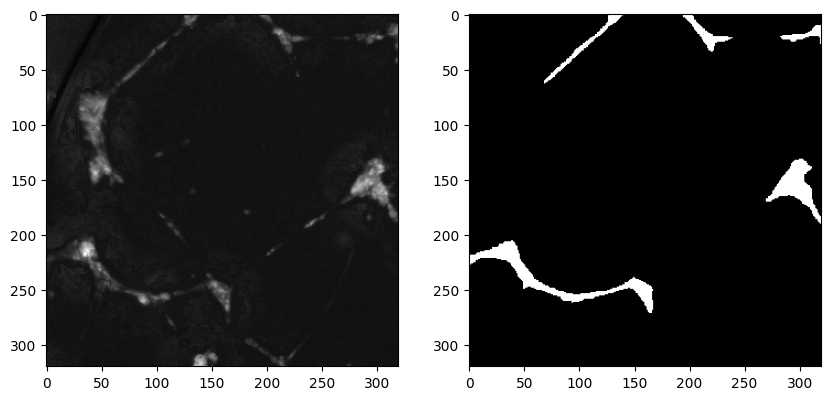

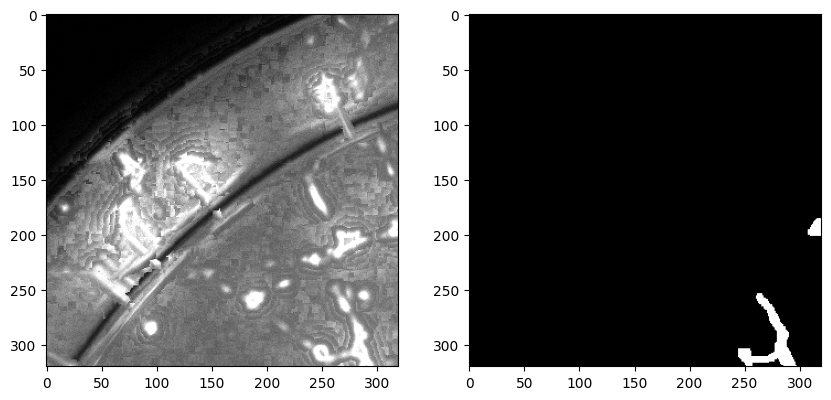

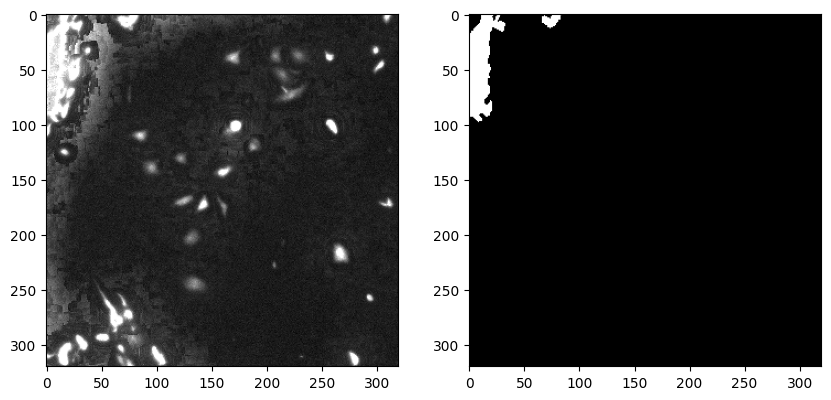

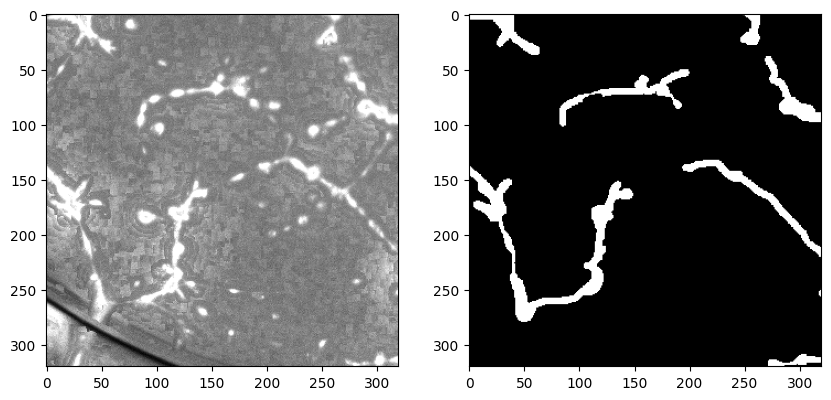

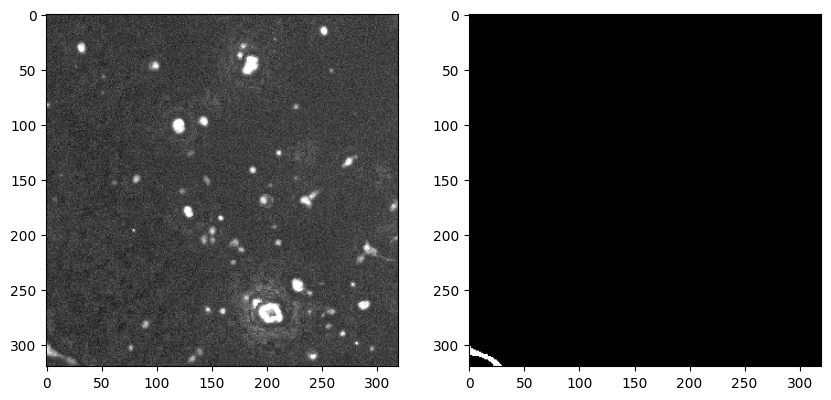

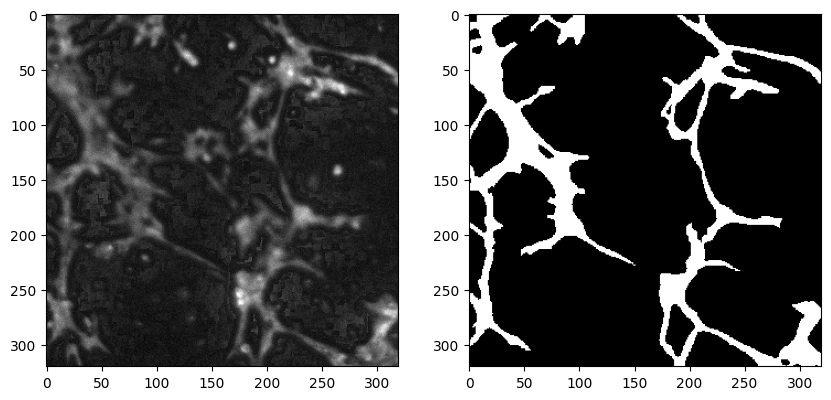

In [ ]:
X, y, _ = val_gen[1]
for i in range(min(batch_size, len(X))):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(X[i][:,:,0], cmap='gray')
    ax[1].imshow(y[i][:,:,0], cmap='gray')
    plt.show()

<a name="training-configuration"></a>
## Training configuration

*We'll warm up to the initial learning rate and either use a cyclic schedule or reduce it when val_loss plateaus.*

Parameters you should customize:
- `n_epochs`
- `hp_search_epochs`
- `weight_decay`

Extra parameters you should customize for cyclic schedule:
- `cyclic_lr_mult`
- `num_cycles`

Extra parameters you should customize for reduce lr on plateau:
- `lr_patience`
- `lr_reduction_factor`

In [ ]:
n_epochs = 50
hp_search_epochs = n_epochs // 5

epoch_len = math.ceil(((len(train_img_paths)) * train_gen.repeat_n_times) / batch_size)
linear_warmup_steps = epoch_len

# use_cosine_decay_restarts: true to use a cyclic lr schedule, false for ReduceLROnPlateau
use_cosine_decay_restarts = True

# get optimizer options for grid search (vary the initial learning rate)
hp_search_optimizer_options = []
for initial_lr in hp_search_initial_lr_options:
    if use_cosine_decay_restarts:
        # cosine annealing parameters - timed so the last cycle ends at the end of training
        cycle_lr_mult = 0.5         # decrease initial lr at the end of each cycle (m_mul)
        num_cycles = 3              # number of full cycles

        # figure out what the first_decay_steps should be
        # start counting after the warmup steps
        total_steps = epoch_len * n_epochs - linear_warmup_steps

        # round up and add 1 to prevent an extra restart at the end
        first_decay_steps = math.ceil(total_steps / (2**num_cycles - 1)) + 1

        learning_rate = optimizers.schedules.CosineDecayRestarts(
            initial_learning_rate=initial_lr,
            first_decay_steps=first_decay_steps,
            t_mul=2.0,  # our first_decay_steps calculation assumes t_mul=2
            m_mul=cycle_lr_mult
        )
        learning_rate = optimizers.serialize(learning_rate)
    else:
        # patience: number of epochs with no improvement after which learning rate will be reduced
        patience = 4
        lr_reduction_factor = 0.5
        learning_rate = initial_lr
        reduce_lr = ReduceLROnPlateau(
            monitor='val_loss',
            factor=lr_reduction_factor,
            patience=patience,
            verbose=1,
            mode='min'
        )

    lr_schedule = models_util.WarmupSchedule(warmup_steps=linear_warmup_steps,
                                             after_warmup_lr=learning_rate)

    weight_decay = 1e-4     # weight decay for AdamW

    optimizer = optimizers.experimental.AdamW(learning_rate=lr_schedule, weight_decay=weight_decay)
    optimizer_config = optimizers.serialize(optimizer)

    hp_search_optimizer_options.append(optimizer_config)

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/__init__.py:100: UserWarning: The `keras.optimizers.serialize()` API should only be used for objects of type `keras.optimizers.Optimizer`. Found an instance of type <class 'keras.src.optimizers.schedules.learning_rate_schedule.CosineDecayRestarts'>, which may lead to improper serialization.
  warnings.warn(


## Hyperparameter search

In [ ]:
metrics=[models_util.mean_iou_coef_factory(thresh=0.5)]
loss = BinaryCrossentropy()

callbacks = []

# csv logger - clear previous log if it exists

if os.path.exists(f"{training_dir}/hp_search_log.csv"):
    os.remove(f"{training_dir}/hp_search_log.csv")
csv_logger = CSVLogger(f"{training_dir}/hp_search_log.csv", append=True)

callbacks.append(csv_logger)

# reduce lr on plateau
if not use_cosine_decay_restarts:
    callbacks.append(reduce_lr)

gs = models.UNetXceptionGridSearch(
    save_dir=f"{training_dir}/hp_search",
    filter_counts_options=filter_counts_options,
    n_outputs=1,
    img_shape=target_shape,
    optimizer_cfg_options=hp_search_optimizer_options,
    loss=loss,
    output_act="sigmoid",
    metrics=metrics,
    callbacks=callbacks
)

with custom_object_scope({'WarmupSchedule': models_util.WarmupSchedule,
                          'AdamW': optimizers.experimental.AdamW}):
    gs.search(
        "val_mean_iou_coef",
        "max",
        train_gen,
        steps_per_epoch=len(train_gen),
        search_verbose=True,
        validation_data=val_gen,
        validation_steps=len(val_gen),
        epochs=hp_search_epochs,
        use_multiprocessing=True, workers=4
    )

Testing filter counts: (16, 32, 64, 128)
Optimizer index: 0
Epoch 1/10
 58/212 [=======>......................] - ETA: 2:01 - loss: 2.4464 - mean_iou_coef: 0.0495

In [ ]:
# Get the best learning rate schedule
with custom_object_scope({'WarmupSchedule': models_util.WarmupSchedule}):
    best_lr_schedule = gs.best_optimizer_cfg['config']['learning_rate']

In [ ]:
# Show the best hyperparameters
print("Best filter counts: ", gs.best_filter_counts)
print("Best optimizer: ", gs.best_optimizer_cfg)
print("Best initial learning rate: ", round(float(best_lr_schedule(linear_warmup_steps)), 6))
print("Best score: ", gs.best_score)
print("Best score index: ", gs.best_score_idx)

## Train the model

In [ ]:
K.clear_session()

with custom_object_scope({'WarmupSchedule': models_util.WarmupSchedule}):
    optimizer = optimizers.deserialize(gs.best_optimizer_cfg)

model = models.build_UNetXception(1, target_shape, filter_counts=gs.best_filter_counts,
                                  output_act="sigmoid")

metrics=[models_util.mean_iou_coef_factory(thresh=0.5)]

model.compile(optimizer=optimizer, loss=BinaryCrossentropy(), metrics=metrics)

callbacks = [
    ModelCheckpoint(checkpoint_save_path, save_best_only=True, save_weights_only=True),
    TensorBoard(log_dir=log_dir, histogram_freq=1),
    CSVLogger(f"{log_dir}/training_log.csv")
]

callbacks = callbacks if use_cosine_decay_restarts else callbacks + [reduce_lr]

h = model.fit(train_gen, validation_data=val_gen, epochs=n_epochs, callbacks=callbacks)

## Test the model

In [ ]:
val_batch_num = 0
val_x, val_y, _ = val_gen[val_batch_num]
preds = model.predict(val_x)

In [ ]:
for sample_idx in range(0, batch_size):
    image = val_x[sample_idx]
    ground_truth = val_y[sample_idx]
    prediction = preds[sample_idx]
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))
    ax[0].imshow(image[:,:,0], cmap='gray')
    ax[0].set_title("Image")
    ax[1].imshow(ground_truth[:,:,0], cmap='gray')
    ax[1].set_title("True Segmentation")
    ax[2].imshow(prediction[:,:,0], cmap='gray')
    ax[2].set_title("Prediction")
    ax[3].imshow(np.greater(prediction, 0.5)[:,:,0], cmap='gray')
    ax[3].set_title("Predicted Segmentation")
    plt.show()

## Save configuration for patch-blending segmentor

In [ ]:
# Create patch segmentor config and save it
cfg = {
    "patch_size": crop_window[0],
    "checkpoint_file": checkpoint_save_path.name,
    "filter_counts": gs.best_filter_counts,
    "ds_ratio": target_shape[0] / crop_window[0],
    "norm_mean": im_mean,
    "norm_std": im_std,
    "channels": 1
}
models_util.save_unet_patch_segmentor_cfg(cfg)